In [2]:
# prompt: Can you create a python dataframe populated with this data:
#   { month: "1/23", users: 50, date: new Date(2023, 0, 1) }, // January 2023
#   { month: "8/23", users: 100, date: new Date(2023, 7, 1) }, // August 2023
#   { month: "8/24", users: 200, date: new Date(2024, 7, 1) }, // August 2024
#   { month: "10/24", users: 250, date: new Date(2024, 9, 1) }, // October 2024
#   { month: "12/24", users: 300, date: new Date(2024, 11, 1) }, // December 2024
#   { month: "2/25", users: 400, date: new Date(2025, 1, 1) }, // February 2025

import pandas as pd

data = {
    'month': ["1/23", "8/23", "8/24", "10/24", "12/24", "2/25"],
    'users': [50, 100, 200, 250, 300, 400],
    'date': pd.to_datetime(['2023-01-01', '2023-08-01', '2024-08-01', '2024-10-01', '2024-12-01', '2025-02-01'])
}

df = pd.DataFrame(data)

df


,month,users,date
0,1/23,50,2023-01-01
1,8/23,100,2023-08-01
2,8/24,200,2024-08-01
3,10/24,250,2024-10-01
4,12/24,300,2024-12-01
5,2/25,400,2025-02-01


In [3]:
# prompt: That is bad data. Go back to the original dataframe and drop the month column, storing in a new dataframe called weekly_users

# Drop the 'month' column from the original df DataFrame
weekly_users = df.drop('month', axis=1)


         date  predicted_users
0  2025-01-01       352.494844
1  2025-02-01       385.390194
2  2025-03-01       415.102122
3  2025-04-01       447.997472
4  2025-05-01       479.831681
5  2025-06-01       512.727031
6  2025-07-01       544.561240
7  2025-08-01       577.456590
8  2025-09-01       610.351939
9  2025-10-01       642.186149
10 2025-11-01       675.081498
11 2025-12-01       706.915708


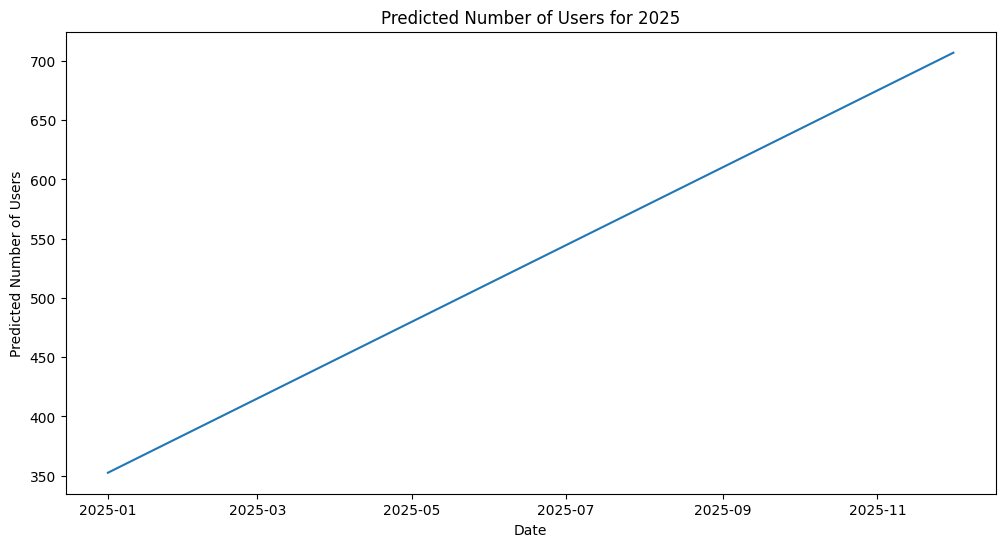

In [4]:
# prompt: Now make a linear regression model with SKLearn library to predict the number of weekly active users for every month in 2025.

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

data = {
    'month': ["1/23", "8/23", "8/24", "10/24", "12/24", "2/25"],
    'users': [50, 100, 200, 250, 300, 400],
    'date': pd.to_datetime(['2023-01-01', '2023-08-01', '2024-08-01', '2024-10-01', '2024-12-01', '2025-02-01'])
}

df = pd.DataFrame(data)

# Convert 'date' to ordinal values for linear regression
df['date_ordinal'] = df['date'].apply(lambda date: date.toordinal())

# Prepare the data
X = df[['date_ordinal']]
y = df['users']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Create a date range for 2025
future_dates = pd.date_range(start='2025-01-01', end='2025-12-31', freq='MS') # Month start
future_dates_ordinal = [date.toordinal() for date in future_dates]
future_dates_df = pd.DataFrame({'date_ordinal': future_dates_ordinal})

# Predict the number of users for 2025
predicted_users_2025 = model.predict(future_dates_df)

# Create a DataFrame for the predictions
predictions_df = pd.DataFrame({'date': future_dates, 'predicted_users': predicted_users_2025})

# Print the predictions
print(predictions_df)

#Plot the predictions
plt.figure(figsize=(12,6))
sns.lineplot(x='date', y='predicted_users', data=predictions_df)
plt.xlabel('Date')
plt.ylabel('Predicted Number of Users')
plt.title('Predicted Number of Users for 2025')
plt.show()


In [6]:
predictions_df['weekly queries'] = (predictions_df['predicted_users']*70/4).round(0)
predictions_df['monthly queries'] = predictions_df['weekly queries']*4
predictions_df['energy kWh'] = predictions_df['monthly queries']*4/1000
predictions_df

,date,predicted_users,energy kWh,weekly queries,monthly queries
0,2025-01-01,352.494844,98.704,6169.0,24676.0
1,2025-02-01,385.390194,107.904,6744.0,26976.0
2,2025-03-01,415.102122,116.224,7264.0,29056.0
3,2025-04-01,447.997472,125.440,7840.0,31360.0
4,2025-05-01,479.831681,134.352,8397.0,33588.0
5,2025-06-01,512.727031,143.568,8973.0,35892.0
6,2025-07-01,544.561240,152.480,9530.0,38120.0
7,2025-08-01,577.456590,161.680,10105.0,40420.0
8,2025-09-01,610.351939,170.896,10681.0,42724.0
9,2025-10-01,642.186149,179.808,11238.0,44952.0


In [7]:
predictions_df['water L'] = predictions_df['monthly queries']*12.4/1000
predictions_df

,date,predicted_users,energy kWh,weekly queries,monthly queries,water L
0,2025-01-01,352.494844,98.704,6169.0,24676.0,305.9824
1,2025-02-01,385.390194,107.904,6744.0,26976.0,334.5024
2,2025-03-01,415.102122,116.224,7264.0,29056.0,360.2944
3,2025-04-01,447.997472,125.440,7840.0,31360.0,388.8640
4,2025-05-01,479.831681,134.352,8397.0,33588.0,416.4912
5,2025-06-01,512.727031,143.568,8973.0,35892.0,445.0608
6,2025-07-01,544.561240,152.480,9530.0,38120.0,472.6880
7,2025-08-01,577.456590,161.680,10105.0,40420.0,501.2080
8,2025-09-01,610.351939,170.896,10681.0,42724.0,529.7776
9,2025-10-01,642.186149,179.808,11238.0,44952.0,557.4048


In [8]:
# prompt: Thats a great table! can you convert it exactly into a .json format for me to copy

import json

# Assuming predictions_df is already defined from the previous code
# Convert the DataFrame to a list of dictionaries
json_data = predictions_df.to_dict(orient='records')

# Convert the list of dictionaries to a JSON string
json_string = json.dumps(json_data, indent=2)  # Use indent for pretty printing

# Print the JSON string
json_string


TypeError: Object of type Timestamp is not JSON serializable